<a href="https://colab.research.google.com/github/halxhernandez/Proyectos-De-Aprendizaje-Automatico/blob/main/Modelo_De_Precios_De_Vivienda_En_California.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

# **Modelo De Precios De Vivienda En California**

</center>

## **Objetivo**

Ilustrar los pasos principales de un proyecto de aprendizaje automático

## **Pasos Principales**

Los pasos principales a seguir son los siguientes:

1. Analizar el panorama general.
2. Obtener los datos.
3. Explorar y visualizar los datos para obtener información.
4. Preprarar los datos para algortimos de aprendizaje automático.
5. Selecccionar un modelo y entrenarlo.
6. Ajustar un modelo.
7. Presentar la solución.
8. Implementar, supervisar y manetener el sistema.

## **Datos Utilizados**



En este proyecto se utilizó el conjunto de datos de Precios de Vivienda de California del repositorio StatLib. Este conjunto se basa en datos del censo de California de 1990. Aunque no es reciente, posee muchas cualidades útiles para análisis y modelado. Para fines didácticos, se añadió un atributo categórico y se eliminaron algunas características.

## **1. Analizar El Panorama General**

La tarea consiste en usar los datos del censo de California para construir un modelo de precios de vivienda en el estado.

Estos datos incluyen métricas como la población, la mediana de ingresos y el precio medio de la vivienda para cada grupo de manzanas en California. Los grupos de manzanas son la unidad geográfica más pequeña para la que la Oficina del Censo de EE. UU. publica datos de muestra (un grupo de manzanas suele tener una población de 600 a 3000 personas). Se les llamará “distritos” para abreviar.

El modelo deberá aprender de estos datos y ser capaz de predecir el precio medio de la vivienda en cualquier distrito, considerando todas las demás métricas.

### **1.1. Enmarcar El Problema**

La primera pregunta que un analista debe hacer a su jefe es: ¿Cuál es exactamente el objetivo del negocio? Desarrollar un modelo probablemente no sea el objetivo final. ¿Cómo espera la empresa utilizar y beneficiarse de este modelo? Conocer el objetivo es importante, ya que determinará cómo se enmarcará el problema, qué algoritmos se seleccionarán, qué medida de rendimiento se usará para evaluar el modelo y cuánto esfuerzo se dedicará a ajustarlo.  

El jefe responde que el resultado del modelo (una predicción del precio medio de la vivienda en un distrito) se incorporará a otro sistema de aprendizaje automático, junto con muchas otras señales. Este sistema posterior determinará si vale la pena invertir en una zona determinada. Acertar con esto es fundamental, ya que afecta directamente a los ingresos.  

La siguiente pregunta que el analista debe hacer es: ¿Cuál es la solución actual? (si la hay). La situación actual a menudo dará una referencia del rendimiento, así como ideas sobre cómo resolver el problema. La empresa responde que los precios de las viviendas por distrito se estiman manualmente por expertos: un equipo recopila información actualizada sobre un distrito y, cuando no pueden obtener el precio medio de la vivienda, lo estiman utilizando reglas complejas.  

Este método resulta costoso y requiere mucho tiempo, y las estimaciones no son muy precisas; cuando se logra averiguar el precio medio real de la vivienda, a menudo se descubre que las estimaciones estaban equivocadas en más de un 30 %. Por ello, la empresa considera útil entrenar un modelo para predecir el precio medio de la vivienda de un distrito, a partir de otros datos sobre dicho distrito. Los datos del censo parecen ser un excelente conjunto de datos para este propósito, ya que incluyen los precios medios de la vivienda de miles de distritos, así como otros datos.  

Con toda esta información, el equipo ya está listo para empezar a diseñar el sistema. Primero, debe determinar qué tipo de supervisión de entrenamiento necesitará el modelo: ¿se trata de una tarea de aprendizaje supervisado, no supervisado, semisupervisado, autosupervisado o de refuerzo? ¿Y es una tarea de clasificación, de regresión o algo más? ¿Debería utilizar técnicas de aprendizaje por lotes o en línea? Antes de continuar, conviene detenerse e intentar responder estas preguntas.  

Tras analizarlo, se observa que esta es claramente una tarea de **aprendizaje supervisado**, ya que el modelo se puede entrenar con ejemplos etiquetados (cada instancia incluye el resultado esperado, es decir, el precio medio de la vivienda del distrito). Es una tarea de **regresión**, ya que se le pedirá al modelo que prediga un valor numérico. Más específicamente, se trata de un problema de **regresión múltiple**, ya que el sistema utilizará múltiples características para realizar una predicción (la población del distrito, la mediana de ingresos, etc.). También es un problema de regresión univariante, ya que solo se busca predecir un valor único para cada distrito. Si se intentara predecir varios valores por distrito, sería un problema de regresión multivariante. Finalmente, dado que no existe un flujo continuo de datos que ingrese al sistema, no hay necesidad de ajustarse rápidamente a cambios de datos y el volumen de información es lo suficientemente pequeño como para caber en memoria, por lo que el aprendizaje por lotes simple debería ser suficiente.  

### **1.2. Seleccionar Una Medida De Rendimiento**

El siguiente paso consiste en seleccionar una medida de rendimiento. Una medida de rendimiento típica para problemas de regresión es el error cuadrático medio (RMSE). Este proporciona una idea del error típico del sistema en sus predicciones, y otorga mayor importancia a los errores grandes. La ecuación 2-1 muestra la fórmula matemática para calcular el RMSE.  

$$RMSE(X, h) = \sqrt{\frac{1}{m} \sum_{i=1}^{m} \left(h(x_{(i)}) - y_{(i)}\right)^2}$$

Aunque el RMSE suele ser la medida de rendimiento preferida para las tareas de regresión, en algunos contextos puede ser más conveniente usar otra función. Por ejemplo, si existen muchos distritos con valores atípicos, se puede considerar el uso del error absoluto medio (MAE, también llamado desviación absoluta promedio).  

$$MAE(X, h) = \frac{1}{m} \sum_{i=1}^{m} \left| h(x_{(i)}) - y_{(i)} \right|$$  

Tanto el RMSE como el MAE son formas de medir la distancia entre dos vectores: el vector de predicciones y el vector de valores objetivo. Existen varias medidas de distancia, conocidas como **normas**:  

- Calcular la raíz de una suma de cuadrados (RMSE) corresponde a la **norma euclidiana** o **norma ℓ2**, que es el concepto de distancia más común.  
- Calcular la suma de valores absolutos (MAE) corresponde a la **norma ℓ1**, también llamada **norma de Manhattan**, porque mide la distancia entre dos puntos de una ciudad si solo se puede viajar a lo largo de calles ortogonales.  

De manera más general, la **norma ℓp** de un vector \(v\) con \(n\) elementos se define como:  

$$\|v\|_p = \left( \sum_{i=1}^{n} |v_i|^p \right)^{1/p}$$

A medida que aumenta el índice \(p\), la norma se enfoca más en los valores grandes e ignora los pequeños. Por esta razón, el **RMSE es más sensible a los valores atípicos** que el MAE. Sin embargo, cuando los valores atípicos son muy escasos y los datos siguen una distribución aproximadamente normal, el **RMSE suele funcionar muy bien y generalmente se prefiere**.  

### **1.3. Verificar Las Suposiciones**


Por último, es recomendable enumerar y verificar las suposiciones realizadas hasta el momento (ya sea por el propio equipo o por otros), ya que esto puede ayudar a detectar problemas graves con antelación.  

Por ejemplo, los precios por distrito que genere el sistema se introducirán en un sistema de aprendizaje automático posterior, y se asume que estos precios se utilizarán directamente. Pero ¿Qué ocurre si el sistema posterior convierte los precios en categorías (por ejemplo, "barato", "medio" o "caro") y luego emplea esas categorías en lugar de los valores numéricos? En ese caso, obtener el precio exacto no sería lo más importante; el sistema únicamente necesitaría clasificar correctamente. Si así fuera, el problema debería haberse planteado como una tarea de **clasificación**, no de **regresión**.  

Este tipo de errores es preferible identificarlos desde el inicio y no después de haber trabajado durante meses en un modelo de regresión. Afortunadamente, tras conversar con el equipo encargado del sistema downstream, se confirma que realmente necesitan los precios reales, no solo las categorías. Con ello, el planteamiento es correcto y el equipo puede comenzar la programación.  

## **2. Obtener Los Datos**


### **2.1. Descargar Los Datos**


En entornos típicos, los datos estarían disponibles en una base de datos relacional o en algún otro almacén de datos, distribuidos en múltiples tablas, documentos o archivos. Para acceder a ellos, primero se necesitarían obtener las credenciales y autorizaciones de acceso, además de familiarizarse con el esquema de los datos.  

Sin embargo, en este proyecto, el proceso es mucho más sencillo: se descarga un único archivo comprimido, `housing.tgz`, que contiene un archivo CSV llamado `housing.csv` con todos los datos.  

En lugar de descargar y descomprimir los datos manualmente, suele ser preferible escribir una función que lo haga automáticamente. Esto es especialmente útil si los datos cambian con frecuencia, ya que permite ejecutar un pequeño script para obtener los datos más recientes o configurar una tarea programada para actualizar los datos a intervalos regulares. Automatizar este proceso también facilita la instalación del conjunto de datos en varios equipos.  

A continuación se muestra la función para obtener y cargar los datos:

In [49]:
# Importar librerías necesarias
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request
import warnings
warnings.filterwarnings('ignore')


# Función para obtener y cargar los datos
def load_housing_data():

    # Definir ruta del archivo
    data_path = Path('datasets/housing.tgz')

    # Descargar archivo si no existe
    if not data_path.is_file():
        Path('datasets').mkdir(parents=True, exist_ok=True)
        url = 'https://github.com/ageron/data/raw/main/housing.tgz'
        urllib.request.urlretrieve(url, data_path)

        # Extraer contenido del archivo tar
        with tarfile.open(data_path) as housing_tarball:
            housing_tarball.extractall(path='datasets')

    # Cargar CSV en DataFrame
    csv_path = Path('datasets/housing/housing.csv')
    return pd.read_csv(csv_path)

# Cargar los datos
housing = load_housing_data()

Al ejecutar la función `load_housing_data()`, esta busca el archivo **`datasets/housing.tgz`**.  
Si no lo encuentra, crea el directorio **`datasets`** dentro del directorio de trabajo actual (en Google Colab corresponde a **`/content`** por defecto).  

A continuación, descarga el archivo **`housing.tgz`** desde el repositorio [ageron/data](https://github.com/ageron/data) en GitHub y extrae su contenido en el directorio **`datasets`**.  
Como resultado, se genera la carpeta **`datasets/housing`**, que contiene el archivo **`housing.csv`**.  

Finalmente, la función carga este archivo CSV en un **DataFrame de Pandas**, el cual contiene todos los datos y lo devuelve listo para su análisis.



### **2.2. Vistazo Rápido A La Estructura De Los Datos**


Se puede comenzar observando las primeras cinco filas de datos mediante el método `head()` del DataFrame.

In [50]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Cada fila representa un distrito. Existen 10 atributos: longitud, latitud, edad media de la vivienda, total de habitaciones, total de dormitorios, población, hogares, ingresos medios, valor medio de la vivienda y proximidad al océano.

El método `info()` es útil para obtener una descripción rápida de los datos, incluyendo el número total de filas, el tipo de cada atributo y la cantidad de valores no nulos.


In [51]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


El conjunto de datos contiene 20,640 instancias, lo que lo hace relativamente pequeño según los estándares de aprendizaje automático, pero adecuado para comenzar.  

Se observa que el atributo `total_bedrooms` solo tiene 20,433 valores no nulos, lo que indica que 207 distritos carecen de este dato. Esto deberá ser tratado más adelante.  

Todos los atributos son numéricos, excepto `ocean_proximity`. Su tipo es `object`, lo que significa que puede contener cualquier tipo de objeto de Python. Sin embargo, al cargarse desde un archivo CSV, se sabe que este atributo corresponde a texto. Al observar las primeras filas, se nota que los valores en `ocean_proximity` se repiten, por lo que probablemente se trate de un atributo categórico.
  

Para conocer las categorías existentes y la cantidad de distritos en cada una, se puede usar el método `value_counts()`.


In [52]:
print(housing['ocean_proximity'].value_counts())

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64


A continuación, se puede examinar el resto de los atributos numéricos.  

El método `describe()` ofrece un resumen estadístico de estos atributos, incluyendo el conteo, la media, la desviación estándar, los valores mínimo y máximo, así como los percentiles 25%, 50% y 75%.


In [53]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Las filas correspondientes a recuento, media, mínimo y máximo se explican por sí mismas.  

Es importante destacar que los valores nulos se ignoran (por ejemplo, el recuento de `total_bedrooms` es 20,433, no 20,640).  

La fila `std` indica la desviación estándar, que mide la dispersión de los valores. Las filas 25%, 50% y 75% muestran los percentiles correspondientes: un percentil indica el valor por debajo del cual se encuentra un porcentaje determinado de observaciones.  
Por ejemplo, el 25% de los distritos tiene una edad mediana de vivienda inferior a 18 años, el 50% inferior a 29 años y el 75% inferior a 37 años. Estos valores suelen llamarse percentil 25 (primer cuartil), mediana y percentil 75 (tercer cuartil).  

Otra forma rápida de comprender los datos es dibujar un histograma para cada atributo numérico. Un histograma muestra el número de instancias (eje vertical) que se encuentran dentro de un rango de valores determinado (eje horizontal). Se puede dibujar un atributo a la vez o utilizar el método `hist()` para todo el DataFrame, lo que generará un histograma para cada atributo numérico.


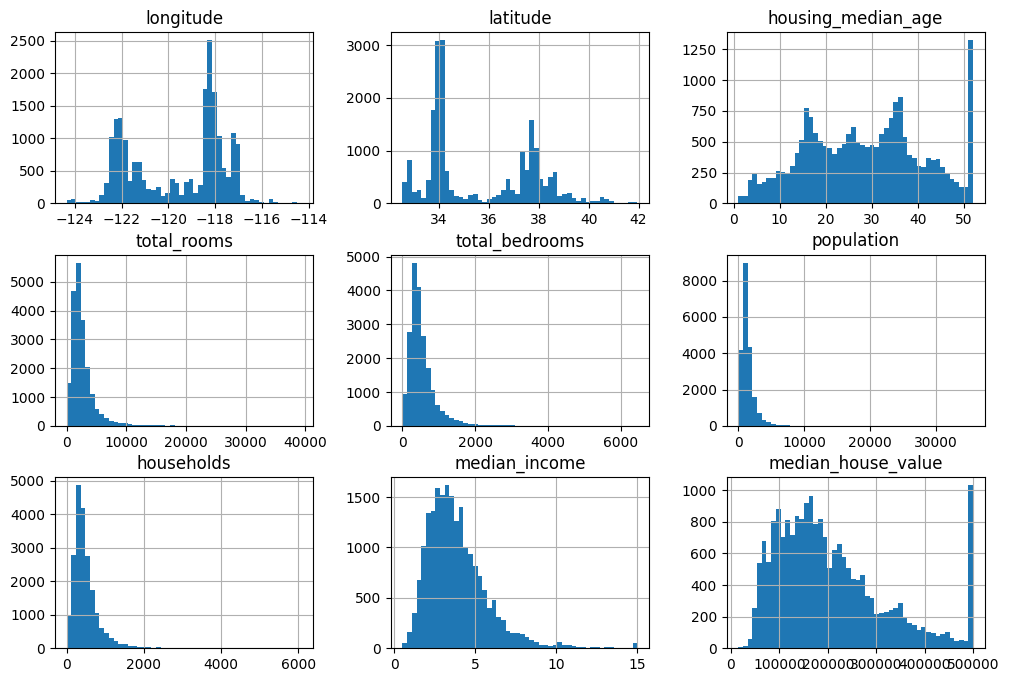

In [54]:
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(12, 8))
plt.show()

Al observar estos histogramas, se pueden identificar varias observaciones:

En primer lugar, el atributo de ingresos medianos no está expresado directamente en dólares estadounidenses (USD). Tras consultar con el equipo que recopiló los datos, se confirma que los valores se han escalado y limitado a 15 (en realidad 15,0001) para los ingresos más altos y a 0,5 (en realidad 0,4999) para los ingresos más bajos. Estos valores representan aproximadamente decenas de miles de dólares (por ejemplo, 3 equivale a unos 30,000 $). Trabajar con atributos preprocesados es habitual en aprendizaje automático, y no constituye necesariamente un problema, aunque es recomendable comprender cómo se calcularon los datos.

La edad mediana de las viviendas y el valor mediano de las casas también presentan límites. Esto último puede ser problemático, ya que se trata del atributo objetivo (las etiquetas). Los algoritmos podrían aprender que los precios nunca superan ese límite. Es necesario consultar con el equipo del cliente para determinar si esto representa un inconveniente. Si se requiere precisión incluso por encima de $500,000, existen dos alternativas:

1. Recopilar las etiquetas correctas para los distritos que fueron limitados.
  
2. Eliminar esos distritos del conjunto de entrenamiento (y también del conjunto de prueba, ya que el sistema no debería ser evaluado negativamente al predecir valores superiores a $500,000).

Además, estos atributos tienen escalas muy diferentes, lo cual se abordará más adelante al explorar el escalado de características.

Finalmente, muchos histogramas muestran sesgo a la derecha: se extienden más hacia valores altos que hacia la izquierda de la mediana. Esto puede dificultar que algunos algoritmos de aprendizaje automático detecten patrones. Más adelante, se intentará transformar estos atributos para obtener distribuciones más simétricas y con forma de campana.

Con esto, se obtiene una comprensión más clara del tipo de datos con los que se está trabajando.

**ADVERTENCIA**  

Antes de continuar con el análisis, es importante crear un conjunto de prueba, reservarlo y no volver a consultarlo hasta que se necesite para evaluar el modelo.


### **2.3. Crear Un Conjunto De Prueba**

Puede parecer extraño descartar voluntariamente parte de los datos en esta etapa. Después de todo, solo se ha realizado un vistazo rápido y probablemente aún queda mucho por aprender antes de decidir qué algoritmos usar.  

Sin embargo, el cerebro humano es excelente para detectar patrones, lo que también lo hace propenso al sobreajuste: si se observa el conjunto de prueba, es posible identificar patrones aparentes que lleven a seleccionar un modelo específico. Esto haría que la estimación del error de generalización usando el conjunto de prueba sea demasiado optimista, y el sistema final podría no funcionar como se esperaba. Este fenómeno se conoce como **sesgo de espionaje de datos**.

Crear un conjunto de prueba es conceptualmente sencillo: seleccionar al azar algunas instancias (normalmente el 20% del conjunto de datos, o menos si es muy grande) y reservarlas sin volver a consultarlas hasta la evaluación final del modelo.

Scikit-Learn ofrece varias funciones para dividir conjuntos de datos en múltiples subconjuntos de diferentes maneras.  

La función más sencilla es `train_test_split()`, que presenta las siguientes características:

1. Permite establecer el parámetro `random_state` para fijar la semilla del generador aleatorio y garantizar reproducibilidad.  

2. Admite pasar múltiples conjuntos de datos con el mismo número de filas, dividiéndolos según los mismos índices, lo que resulta especialmente útil cuando se tiene un DataFrame separado para las etiquetas.

In [55]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(
    housing, test_size=0.2,
    random_state=42
)

Hasta ahora se han considerado métodos de muestreo puramente aleatorios. Esto suele ser adecuado si el conjunto de datos es suficientemente grande (especialmente en relación con el número de atributos), pero si no lo es, existe el riesgo de introducir un sesgo de muestreo significativo.

Por ejemplo, cuando una empresa de encuestas decide contactar a 1,000 personas, no las selecciona simplemente al azar de una guía telefónica. Se busca que la muestra sea representativa de toda la población en función de las variables relevantes. En Estados Unidos, la población se compone aproximadamente de un 51,1 % de mujeres y un 48,9 % de hombres. Una encuesta bien diseñada intentaría mantener esta proporción en la muestra: 511 mujeres y 489 hombres, al menos si se espera que las respuestas varíen según el género.

Este enfoque se conoce como **muestreo estratificado**: la población se divide en subgrupos homogéneos llamados estratos, y se selecciona el número adecuado de casos de cada estrato para garantizar que el conjunto de prueba sea representativo de la población general.

Si se realizara un muestreo puramente aleatorio, habría aproximadamente un 10,7 % de probabilidad de obtener un conjunto de prueba con menos del 48,5 % de mujeres o más del 53,5 % de mujeres, lo que podría sesgar significativamente los resultados de la encuesta.

Supongamos que se ha consultado con expertos y se indica que la mediana de ingresos es un atributo muy importante para predecir la mediana de los precios de la vivienda. Es recomendable asegurarse de que el conjunto de prueba sea representativo de las distintas categorías de ingresos en todo el conjunto de datos.

Dado que la mediana de ingresos es un atributo numérico continuo, primero se debe crear un atributo categórico de ingresos.

Al analizar el histograma de la mediana de ingresos, se observa que la mayoría de los valores se agrupan entre 1,5 y 6 (aproximadamente 15,000–60,000 USD), mientras que algunos superan con creces 6. Es importante contar con un número suficiente de instancias en cada estrato; de lo contrario, la estimación de la importancia de un estrato podría estar sesgada. Esto implica que no debe haber demasiados estratos y que cada estrato debe ser lo suficientemente grande.

El siguiente código utiliza la función `pd.cut()` para crear un atributo categórico de ingresos con cinco categorías (etiquetadas del 1 al 5): la categoría 1 va de 0 a 1,5 (menos de $15,000), la categoría 2 de 1,5 a 3, y así sucesivamente.


In [56]:
import numpy as np

housing['income_cat'] = pd.cut(
    housing['median_income'],
    bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
    labels=[1, 2, 3, 4, 5]
)

Estas categorías de ingresos se representan en la siguiente figura.

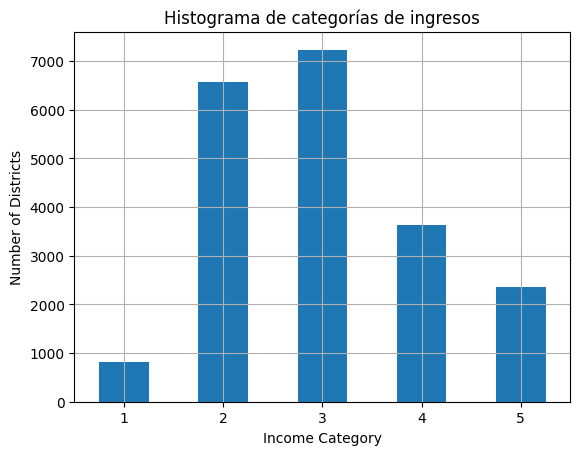

In [57]:
housing['income_cat'].value_counts().sort_index().plot(
    kind='bar', rot=0, grid=True
)
plt.title('Histograma de categorías de ingresos')
plt.xlabel('Income Category')
plt.ylabel('Number of Districts')
plt.show()

Ahora se está listo para realizar un muestreo estratificado según la categoría de ingresos. Scikit-Learn ofrece varias clases en el paquete `sklearn.model_selection` que implementan distintas estrategias para dividir el conjunto de datos en conjuntos de entrenamiento y prueba. Cada clase divisora cuenta con un método `split()` que devuelve un iterador con diferentes divisiones de entrenamiento/prueba de los mismos datos.

Para ser precisos, el método `split()` genera los índices de entrenamiento y prueba, no los datos en sí.  Contar con múltiples divisiones puede ser útil para estimar de manera más precisa el rendimiento del modelo, como se verá al abordar la validación cruzada más adelante.

Por ejemplo, el siguiente código genera 10 divisiones estratificadas diferentes del mismo conjunto de datos:



In [58]:
from sklearn.model_selection import StratifiedShuffleSplit

# Configurar el divisor estratificado
splitter = StratifiedShuffleSplit(
    n_splits=10,
    test_size=0.2,
    random_state=42
)

# Generar las divisiones estratificadas
strat_splits = []
for train_index, test_index in splitter.split(housing, housing['income_cat']):
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

Por el momento, se puede utilizar únicamente la primera división:

In [59]:
strat_train_set, strat_test_set = strat_splits[0]

Dado que el muestreo estratificado es bastante común, también se puede obtener una división única de forma más sencilla utilizando la función `train_test_split()` con el argumento `stratify`.


In [60]:
strat_train_set, strat_test_set = train_test_split(
    housing,
    test_size=0.2,
    stratify=housing["income_cat"],
    random_state=42
)

Se puede verificar si esto funcionó como se esperaba observando las proporciones de las categorías de ingresos en el conjunto de prueba.

In [61]:
print(strat_test_set['income_cat'].value_counts(normalize=True))

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: proportion, dtype: float64


Con un código similar, es posible calcular las proporciones de las categorías de ingresos en el conjunto de datos completo. La siguiente figura compara las proporciones de las categorías de ingresos en el conjunto de datos general, en el conjunto de prueba generado mediante muestreo estratificado y en un conjunto de prueba generado mediante muestreo aleatorio puro. Como se observa, el conjunto de prueba generado mediante muestreo estratificado mantiene proporciones de categorías de ingresos casi idénticas a las del conjunto de datos completo, mientras que el conjunto de prueba generado mediante muestreo aleatorio puro presenta un sesgo.

<center>

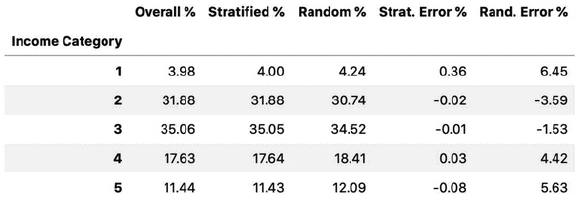

</center>

<center>

*Comparación del sesgo de muestreo entre el muestreo estratificado y el muestreo puramente aleatorio*

</center>

La columna `income_cat` ya no será utilizada, por lo que se ha decidido omitirla y retornar el conjunto de datos a su estado original.


In [62]:
for dataset in (strat_train_set, strat_test_set):
    dataset.drop('income_cat', axis=1, inplace=True)

Se dedicó tiempo significativo a la generación de los conjuntos de prueba por una razón importante: esta etapa es crucial y a menudo se pasa por alto en un proyecto de aprendizaje automático. Además, muchos de los conceptos aplicados serán útiles más adelante durante la validación cruzada. A continuación, se procede a la siguiente etapa: la exploración de los datos.

## **3. Explorar Y Visualizar Los Datos Para Obtener Información**


Hasta este punto, solo se ha realizado una revisión rápida de los datos para obtener una comprensión general del tipo de información que se está manejando. Ahora, el objetivo es profundizar un poco más.  

Primero, se debe asegurar que el conjunto de prueba quede excluido y explorar únicamente el conjunto de entrenamiento. Además, si el conjunto de entrenamiento es muy grande, se puede muestrear un subconjunto para facilitar y agilizar las manipulaciones durante la fase de exploración. En este caso, el conjunto de entrenamiento es relativamente pequeño, por lo que se puede trabajar directamente con el conjunto completo.  

Dado que se van a experimentar varias transformaciones sobre el conjunto de entrenamiento completo, es recomendable hacer una copia del original para poder regresar a él posteriormente.

In [63]:
housing = strat_train_set.copy()

### **3.1. Visualización De Datos Geográficos**


Dado que el conjunto de datos incluye información geográfica (latitud y longitud), se recomienda crear un diagrama de dispersión de todos los distritos para facilitar la visualización de la información.

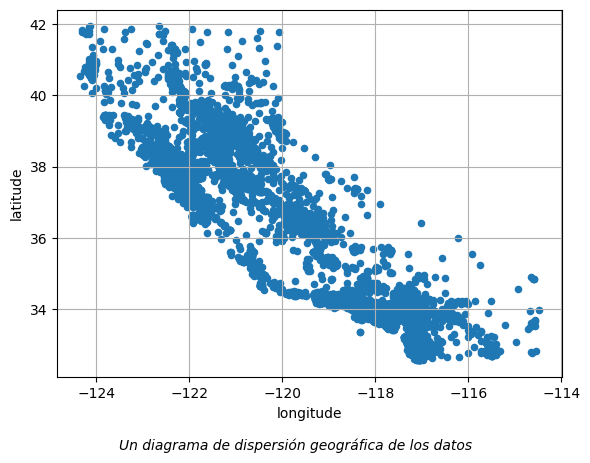

In [64]:
housing.plot(
    kind='scatter',
    x='longitude',
    y='latitude',
    grid=True
)
plt.figtext(
    x=0.5,
    y=0.01,
    s='Un diagrama de dispersión geográfica de los datos',
    style='italic',
    ha='center',
    fontsize=10
)
plt.tight_layout(pad=2.5)
plt.show()

La distribución geográfica se asemeja bastante a la de California, aunque, más allá de eso, resulta difícil identificar un patrón particular. Al establecer la opción `alfa` en 0.2, se facilita la visualización de las áreas con mayor densidad de puntos de datos.

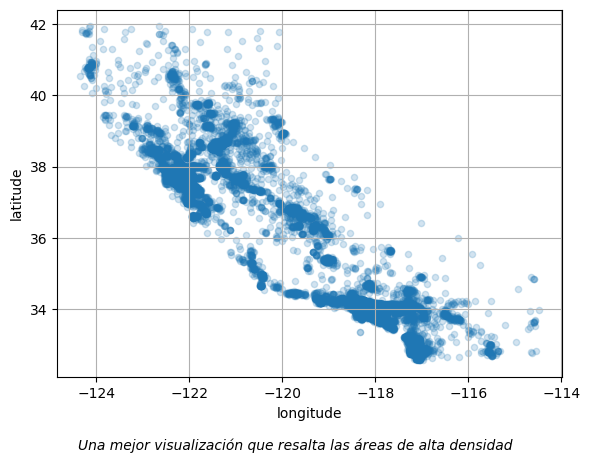

In [65]:
housing.plot(
    kind='scatter',
    x='longitude',
    y='latitude',
    grid=True,
    alpha=0.2
)
plt.figtext(
    x=0.5,
    y=0.01,
    s='Una mejor visualización que resalta las áreas de alta densidad',
    style='italic',
    ha='center',
    fontsize=10
)
plt.tight_layout(pad=2.5)
plt.show()

La visualización mejora significativamente: se pueden observar claramente las zonas de alta densidad, especialmente el Área de la Bahía y los alrededores de Los Ángeles y San Diego, así como una larga franja de alta densidad en el Valle Central (particularmente alrededor de Sacramento y Fresno).  

El cerebro humano es muy eficaz para detectar patrones en imágenes, pero puede ser necesario experimentar con los parámetros de visualización para que los patrones destaquen.


A continuación se muestran los precios de la vivienda. El radio de cada círculo representa la población del distrito (parámetro `s`) y el color indica el precio (parámetro `c`). Se utiliza un mapa de colores predefinido (`cmap`) llamado `jet`, que va del azul (valores bajos) al rojo (precios altos).


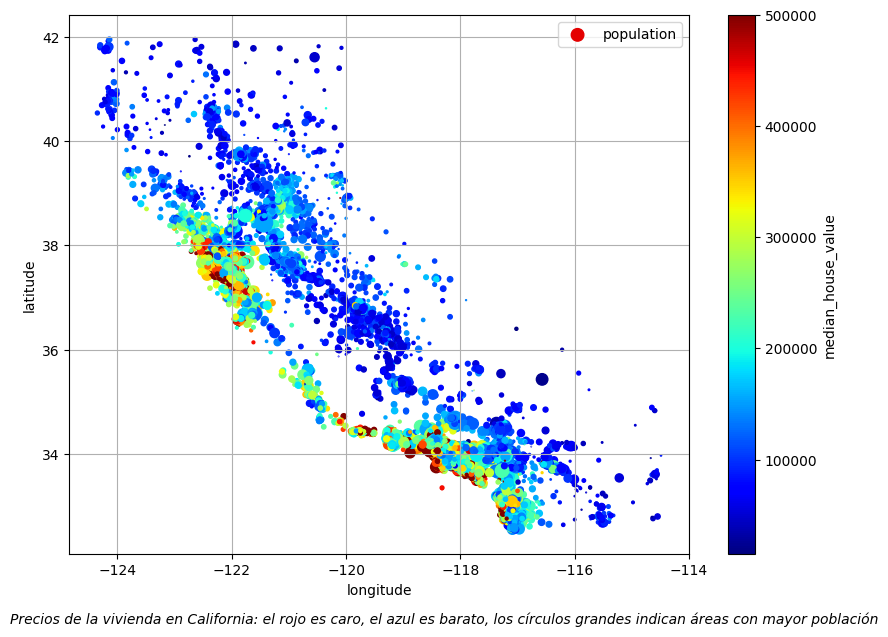

In [66]:
housing.plot(
    kind='scatter',
    x='longitude',
    y='latitude',
    grid=True,
    s=housing['population'] / 100,
    label='population',
    c='median_house_value',
    cmap='jet',
    colorbar=True,
    legend=True,
    sharex=False,
    figsize=(10, 7),
)
plt.figtext(
    x=0.5,
    y=0.01,
    s='Precios de la vivienda en California: el rojo es caro, el azul es barato, los círculos grandes indican áreas con mayor población',
    style='italic',
    ha='center',
    fontsize=10
)
plt.show()

La imagen indica que los precios de la vivienda están fuertemente relacionados con la ubicación (por ejemplo, cercanía al océano) y la densidad de población. Un algoritmo de agrupamiento podría ser útil para identificar los grupos principales y generar nuevas características que midan la proximidad a los centros de esos grupos. El atributo de proximidad al océano también puede ser relevante, aunque en el norte de California los precios de los distritos costeros no son necesariamente altos, por lo que no se trata de una regla universal.


### **3.2. Buscar Correlaciones**

Dado que el conjunto de datos no es demasiado grande, es posible calcular fácilmente el coeficiente de correlación estándar (también conocido como *r* de Pearson) entre cada par de atributos mediante el método `corr()`.


In [67]:
corr_matrix = housing.corr(numeric_only=True)

Ahora es posible observar el grado de correlación de cada atributo con el valor medio de la vivienda.

In [68]:
print(corr_matrix['median_house_value'].sort_values(ascending=False))

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64


El coeficiente de correlación oscila entre –1 y 1. Cuando se aproxima a 1, indica una fuerte correlación positiva; por ejemplo, el valor medio de la vivienda tiende a incrementarse cuando aumenta la mediana de los ingresos. En contraste, cuando el coeficiente se aproxima a –1, refleja una fuerte correlación negativa; en este caso, se observa una ligera correlación negativa entre la latitud y el valor medio de la vivienda (es decir, los precios tienden a disminuir ligeramente al desplazarse hacia el norte).  

Por otra parte, los coeficientes cercanos a 0 indican ausencia de correlación lineal.  

Otra manera de examinar la relación entre atributos es mediante la función `scatter_matrix()` de Pandas, que compara cada atributo numérico con los demás. Dado que existen 11 atributos numéricos, el resultado sería 11 × 11 = 121 gráficos, lo cual excede una sola página. Por este motivo, se decidió enfocar el análisis en algunos atributos prometedores que muestran mayor correlación con el valor medio de la vivienda.

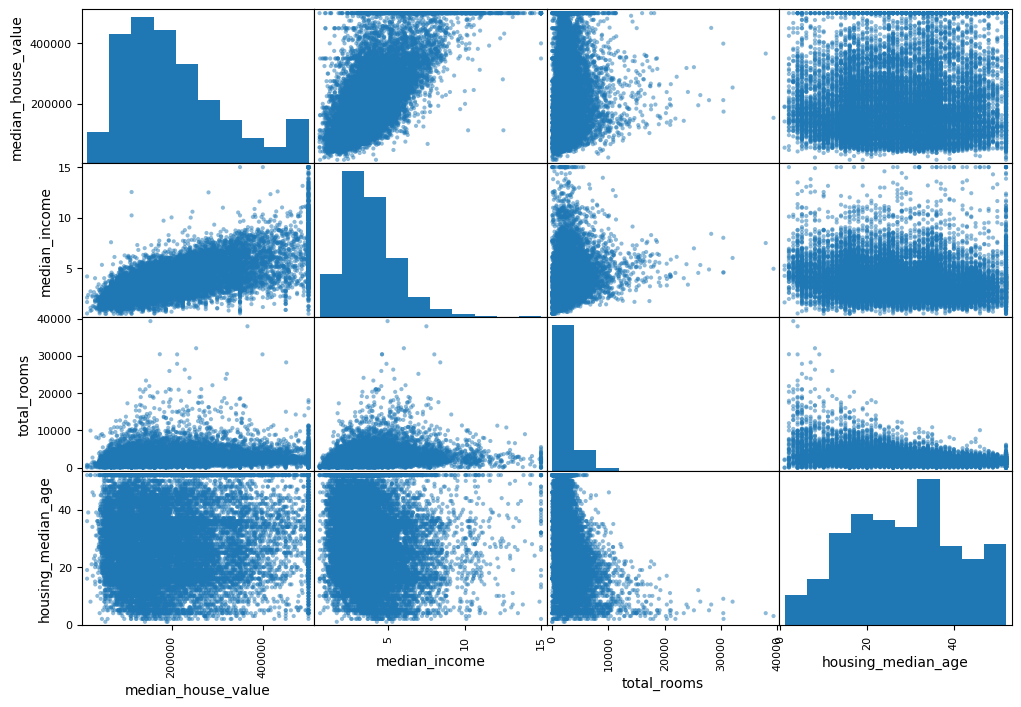

In [69]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

attributes = [
    'median_house_value', 'median_income',
    'total_rooms', 'housing_median_age'
]

scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

*Esta matriz de dispersión representa gráficamente cada atributo numérico en relación con cada uno de los demás atributos numéricos, además de un histograma de los valores de cada atributo numérico en la diagonal principal (de arriba a la izquierda a abajo a la derecha).*

La diagonal principal no representa cada variable contra sí misma, ya que esto solo produciría líneas rectas sin utilidad. En su lugar, Pandas muestra un histograma para cada atributo, lo cual facilita observar su distribución (aunque existen otras opciones configurables en la documentación de Pandas).  

Al analizar los diagramas de dispersión de correlación, se observa que el atributo con mayor potencial para predecir el valor medio de la vivienda es la **mediana de los ingresos**. Por este motivo, se amplía el gráfico correspondiente a dicho atributo para obtener un análisis más detallado.


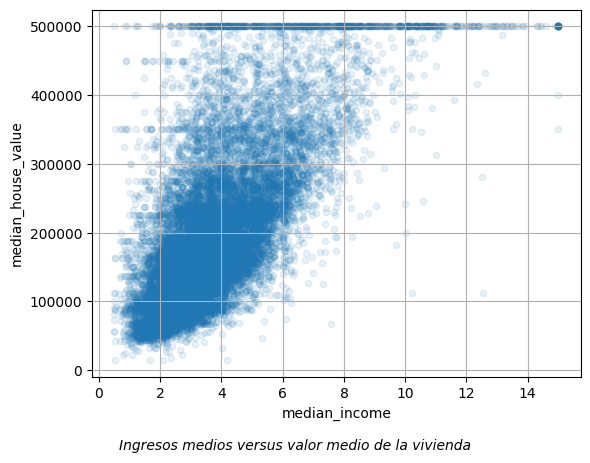

In [70]:
housing.plot(
    kind='scatter',
    x='median_income',
    y='median_house_value',
    alpha=0.1,
    grid=True
)
plt.figtext(
    x=0.5,
    y=0.01,
    s='Ingresos medios versus valor medio de la vivienda',
    style='italic',
    ha='center',
    fontsize=10
)
plt.tight_layout(pad=2.5)
plt.show()

Este gráfico permite observar varios aspectos relevantes:  

- En primer lugar, la correlación entre los ingresos medios y el valor medio de la vivienda es considerablemente fuerte, ya que se aprecia una clara tendencia ascendente y los puntos no presentan una gran dispersión.

- En segundo lugar, se distingue un límite de precio previamente detectado, visible como una línea horizontal en **$500,000**.  

- Adicionalmente, el gráfico revela otras líneas rectas menos evidentes: una alrededor de **450,000**, otra cerca de **350,000**, posiblemente una en torno a **280,000** y algunas más por debajo de este valor.  

Estas líneas sugieren la existencia de valores atípicos o restricciones en los datos. Para mejorar el rendimiento de los modelos predictivos, podría resultar conveniente **eliminar los distritos asociados** y así evitar que los algoritmos reproduzcan estas peculiaridades artificiales.  


### **3.3. Experimentación Con Combinaciones De Atributos**

Las secciones anteriores han mostrado diversas formas de explorar los datos y obtener información valiosa. Durante este análisis se identificaron algunas particularidades que conviene limpiar antes de entrenar un modelo de aprendizaje automático, además de encontrar correlaciones interesantes entre atributos, especialmente con la variable objetivo.  

También se observó que ciertos atributos presentan una distribución sesgada a la derecha, lo que sugiere la necesidad de aplicar transformaciones (por ejemplo, calcular el logaritmo o la raíz cuadrada).  

Si bien cada proyecto presenta variaciones, las ideas generales son similares. Antes de preparar los datos para los algoritmos de aprendizaje automático, resulta útil probar distintas **combinaciones de atributos**.  

Algunos ejemplos relevantes son:  
- El número total de habitaciones en un distrito no aporta gran valor si no se conoce el número de hogares. Lo que realmente interesa es el **número de habitaciones por hogar**.  
- El número total de dormitorios por sí solo tampoco es muy informativo; en cambio, es más útil **compararlo con el total de habitaciones**.  
- La **población por hogar** también representa una combinación de atributos interesante para el análisis.  

La creación de estos nuevos atributos puede realizarse de la siguiente manera:  


In [71]:
housing['rooms_per_house'] = housing['total_rooms'] / housing['households']
housing['bedrooms_ratio'] = housing['total_bedrooms'] / housing['total_rooms']
housing['people_per_house'] = housing['population'] / housing['households']

A continuación, se vuelve a revisar la matriz de correlación:

In [72]:
corr_matrix = housing.corr(numeric_only=True)
print(corr_matrix['median_house_value'].sort_values(ascending=False))

median_house_value    1.000000
median_income         0.688380
rooms_per_house       0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people_per_house     -0.038224
longitude            -0.050859
latitude             -0.139584
bedrooms_ratio       -0.256397
Name: median_house_value, dtype: float64


El nuevo atributo *bedrooms_ratio* mostró una correlación significativamente más alta con el valor medio de la vivienda en comparación con el número total de habitaciones o dormitorios. Esto sugiere que las casas con una proporción más baja de habitaciones por dormitorio tienden a presentar un mayor costo.  

De igual forma, el número de habitaciones por hogar resultó ser un indicador más informativo que el número total de habitaciones en un distrito; en efecto, a mayor tamaño de las viviendas, mayor tiende a ser su valor.  

Esta fase de exploración no necesariamente debe ser exhaustiva. El propósito principal es establecer una base sólida que permita obtener información valiosa y construir un primer prototipo con un desempeño razonablemente bueno. Sin embargo, se trata de un proceso iterativo: una vez que se logre un prototipo inicial, será posible analizar los resultados, obtener nuevos hallazgos y regresar a este paso de exploración para refinar el modelo.


## **4. Preparación De Los Datos Para Algoritmos De Aprendizaje Automático**

Es momento de preparar los datos para los algoritmos de aprendizaje automático. En lugar de realizar este proceso de forma manual, se recomienda implementar funciones específicas para dicho propósito, por varias razones de peso:  

- Permiten **reproducir las transformaciones** fácilmente en cualquier conjunto de datos, incluso cuando se incorporen nuevos datos.  
- Facilitan la construcción gradual de una **biblioteca de funciones de transformación reutilizables** para futuros proyectos.  
- Pueden integrarse en un **sistema en producción**, transformando nuevos datos antes de ser utilizados por los algoritmos.  
- Brindan la posibilidad de **probar distintas combinaciones de transformaciones** y evaluar cuál ofrece el mejor desempeño.  

Antes de iniciar este proceso, es necesario volver a un conjunto de entrenamiento limpio (copiando nuevamente `strat_train_set`). Además, se recomienda separar los **predictores** de las **etiquetas**, ya que no siempre conviene aplicar las mismas transformaciones a ambos. Cabe destacar que el método `drop()` genera una copia de los datos y no modifica directamente a `strat_train_set`.

In [73]:
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

### **4.1. Limpieza De Los Datos**

La mayoría de los algoritmos de aprendizaje automático no pueden trabajar con características faltantes, por lo que es necesario tratarlas adecuadamente. Un ejemplo es el atributo **`total_bedrooms`**, que contiene algunos valores nulos.  

Existen tres estrategias principales para resolver este problema:  

1. **Eliminar los distritos correspondientes**.  
2. **Eliminar el atributo completo**.  
3. **Imputar los valores faltantes** con un valor definido (por ejemplo: cero, la media o la mediana).  

En Pandas, puede lograrse fácilmente utilizando los métodos:  

- `dropna()` → elimina las filas con valores faltantes.  
- `drop()` → elimina columnas completas.  
- `fillna()` → reemplaza los valores faltantes con un valor específico.  

In [74]:
"""
# Opción utilizando 'dropna()'
housing.dropna(
    subset=['total_bedrooms'],
    inplace=True
)

# Opción utilizando 'drop()'
housing.drop(
    'total_bedrooms',
    axis=1
)

# Opción utilizando 'fillna'
median = housing['total_bedrooms'].median()
housing['total_bedrooms'].fillna(
    median,
    inplace=True
)
"""

"\n# Opción utilizando 'dropna()'\nhousing.dropna(\n    subset=['total_bedrooms'],\n    inplace=True\n)\n\n# Opción utilizando 'drop()'\nhousing.drop(\n    'total_bedrooms',\n    axis=1\n)\n\n# Opción utilizando 'fillna'\nmedian = housing['total_bedrooms'].median()\nhousing['total_bedrooms'].fillna(\n    median,\n    inplace=True\n)\n"

Se opta por utilizar la **opción 3** (imputación), ya que resulta ser la menos destructiva.  
En lugar de emplear métodos de Pandas como `fillna()`, se utiliza la clase **`SimpleImputer`** de *Scikit-Learn*.  

La principal ventaja de esta clase es que:  
- Calcula y almacena el valor de la **mediana** de cada característica.  
- Permite aplicar la imputación no solo al **conjunto de entrenamiento**, sino también al **conjunto de validación**, **conjunto de prueba** y a **nuevos datos** que se introduzcan en el modelo.  

Para implementarla, primero se crea una instancia de `SimpleImputer`, especificando que los valores faltantes deben ser reemplazados con la **mediana** del atributo correspondiente.

In [75]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

Dado que la **mediana** únicamente puede calcularse con atributos numéricos, se crea una copia del conjunto de datos que contenga únicamente este tipo de variables. De esta manera se excluye el atributo categórico `ocean_proximity`, que será procesado posteriormente con técnicas adecuadas de codificación.  


In [76]:
housing_num = housing.select_dtypes(include=[np.number])

En este paso se ajusta la instancia del imputador a los datos de entrenamiento utilizando el método `fit()`.  

In [77]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

El imputador ha calculado simplemente la mediana de cada atributo y ha almacenado el resultado en su variable de instancia `statistics_`. Solo el atributo `total_bedrooms` tenía valores faltantes, pero no se puede asegurar que no aparezcan valores faltantes en nuevos datos una vez que el sistema esté en funcionamiento. Por ello, es más seguro aplicar el imputador a todos los atributos numéricos.

In [78]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [79]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

A continuación, se puede utilizar este imputador "entrenado" para transformar el conjunto de entrenamiento, reemplazando los valores faltantes con las medianas calculadas.


In [80]:
X = imputer.transform(housing_num)

In [81]:
housing_tr = pd.DataFrame(
    data=X,
    columns=housing_num.columns,
    index=housing_num.index
)

Los valores faltantes también pueden reemplazarse con el **valor medio** (`strategy="mean"`), con el **valor más frecuente** (`strategy="most_frequent"`) o con un **valor constante** (`strategy="constant"`, `fill_value=…`). Las dos últimas estrategias admiten **datos no numéricos**.



> 💡 **CONSEJO**  
> También hay **imputadores más potentes** disponibles en el paquete `sklearn.impute` (ambos solo para características numéricas):
>
> - **`KNNImputer`** reemplaza cada valor faltante con la **media de los valores de los *k* vecinos más cercanos** para esa característica.  
>   La distancia se basa en **todas las características disponibles**.
>
> - **`IterativeImputer`** entrena un **modelo de regresión por característica** para predecir los valores faltantes basándose en **todas las demás características disponibles**.  
>   Luego, entrena el modelo de nuevo con los datos actualizados y **repite el proceso varias veces**, mejorando los modelos y los valores de reemplazo en cada iteración.


### **4.2. Manejo De Texto Y Atributos Categóricos**

Hasta ahora solo hemos tratado **atributos numéricos**, pero sus datos también pueden contener **atributos de texto**. En este conjunto de datos, solo hay uno: el atributo **`ocean_proximity`**.  

Analicemos su valor en las primeras instancias:


In [82]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head(10)

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
1286,INLAND
18078,<1H OCEAN
4396,NEAR BAY
18031,<1H OCEAN
6753,<1H OCEAN


No es texto arbitrario: hay un **número limitado de valores posibles**, cada uno de los cuales representa una **categoría**. Por lo tanto, este atributo es **categórico**.  

La mayoría de los algoritmos de aprendizaje automático prefieren trabajar con **números**, así que convirtamos estas categorías de texto a números. Para ello, podemos usar la clase **`OrdinalEncoder`** de **Scikit-Learn**:


In [83]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(
    housing_cat
)

Así es como se ven los **primeros valores codificados** en `housing_cat_encoded`:

In [84]:
housing_cat_encoded[:8]

array([[3.],
       [0.],
       [1.],
       [1.],
       [4.],
       [1.],
       [0.],
       [3.]])

Puedes obtener la **lista de categorías** usando la variable de instancia **`categories_`**.

Es una lista que contiene un **array unidimensional de categorías** para cada atributo categórico (en este caso, una lista que contiene un solo array, ya que solo hay un atributo categórico).

In [85]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

Un problema con esta representación es que los algoritmos de **aprendizaje automático (ML)** asumirán que **dos valores cercanos son más similares** que dos valores distantes.

Esto puede ser adecuado en algunos casos (p. ej., para categorías ordenadas como *"malo"*, *"regular"*, *"bueno"* y *"excelente"*), pero **no es el caso** de la columna **`ocean_proximity`** (por ejemplo, las categorías `0` y `4` son claramente más similares que las categorías `0` y `1`).  

Para solucionar este problema, una **solución común** es crear un **atributo binario por categoría**: un atributo igual a `1` cuando la categoría es `"<1H OCEAN"` (y `0` en caso contrario), otro atributo igual a `1` cuando la categoría es `"INLAND"` (y `0` en caso contrario), y así sucesivamente.  

Esto se denomina **codificación one-hot**, porque **solo un atributo será igual a 1** (*caliente*), mientras que los demás serán `0` (*frío*).


Los nuevos atributos a veces se denominan **atributos ficticios** (*dummy attributes*).  

**Scikit-Learn** proporciona una clase **`OneHotEncoder`** para convertir valores categóricos en **vectores one-hot**:

In [86]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

De forma predeterminada, la salida de un **`OneHotEncoder`** es una **matriz dispersa de SciPy**, en lugar de una **matriz de NumPy**:

In [87]:
housing_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

Una **matriz dispersa** es una representación muy eficiente para **matrices que contienen principalmente ceros**. De hecho, internamente solo almacena los **valores distintos de cero y sus posiciones**.  

Cuando un atributo categórico tiene **cientos o miles de categorías**, la **codificación one-hot** da como resultado una matriz muy grande llena de ceros, excepto por un único `1` por fila.

En este caso, una matriz dispersa es justo lo que necesita: **ahorrará mucha memoria y acelerará los cálculos**.  

Puede usar una matriz dispersa **principalmente como un array 2D normal**, pero si desea convertirla en un **array NumPy (denso)**, simplemente llame al método **`.toarray()`**:


In [88]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

Como alternativa, puede establecer **`sparse=False`** al crear el **`OneHotEncoder`**. En este caso, el método **`.transform()`** devolverá directamente una **matriz NumPy regular (densa)**.  

Al igual que con el **`OrdinalEncoder`**, puede obtener la **lista de categorías** utilizando la variable de instancia **`categories_`** del codificador:


In [89]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

**Pandas** tiene una función llamada **`get_dummies()`**, que también convierte cada **característica categórica** en una **representación one-hot**, con una **característica binaria por categoría**:


In [90]:
df_test = pd.DataFrame(
    {'ocean_proximity': ['INLAND', 'NEAR BAY']}
)
pd.get_dummies(df_test, dtype=int)

,ocean_proximity_INLAND,ocean_proximity_NEAR BAY
0,1,0
1,0,1


Parece bonito y sencillo, así que ¿por qué no usarlo en lugar de **`OneHotEncoder`**?  

La ventaja de **`OneHotEncoder`** es que **recuerda con qué categorías se entrenó**. Esto es muy importante porque, una vez que el modelo esté en **producción**, debe recibir **exactamente las mismas características** que durante el entrenamiento: **ni más ni menos**.  

Observa lo que genera nuestro **`cat_encoder`** entrenado cuando lo transformamos con el mismo `df_test`  
(usando **`transform()`**, no `fit_transform()`):

In [91]:
cat_encoder.transform(df_test).toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

¿Ves la diferencia? **`get_dummies()`** solo detectó **dos categorías**, por lo que generó **dos columnas**,  
mientras que **`OneHotEncoder`** generó **una columna por cada categoría aprendida**, en el **orden correcto**.  

Además, si introduces en **`get_dummies()`** un DataFrame que contenga una **categoría desconocida**  
(por ejemplo, `"<2H OCEAN"`), generará **una columna para ella**:

In [92]:
df_test_unknown = pd.DataFrame(
    {'ocean_proximity': ['<2H OCEAN', 'ISLAND']}
)
pd.get_dummies(df_test_unknown, dtype=int)

,ocean_proximity_<2H OCEAN,ocean_proximity_ISLAND
0,1,0
1,0,1


Pero **`OneHotEncoder`** es más inteligente: detectará la **categoría desconocida** y generará una **excepción**.  

Si lo prefiere, puede configurar el **hiperparámetro** `handle_unknown` como `"ignore"`, en cuyo caso solo representará la **categoría desconocida** con ceros.

In [93]:
cat_encoder.handle_unknown = 'ignore'
cat_encoder.transform(df_test_unknown).toarray()

array([[0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

> 💡 **CONSEJO**  
> Si un atributo categórico tiene un gran número de **categorías posibles** (p. ej., código de país, profesión, especie), la **codificación one-hot** generará un gran número de **características de entrada**.  
> Esto puede **ralentizar el entrenamiento** y **reducir el rendimiento**.  
>
> En tal caso, conviene sustituir la entrada categórica por **características numéricas útiles** relacionadas con las categorías:  
> por ejemplo, se podría sustituir la característica `ocean_proximity` por la **distancia al océano**.  
> De forma similar, un código de país se podría sustituir por la **población** y el **PIB per cápita** del país.  
>
> Como alternativa, se puede utilizar uno de los **codificadores del paquete `category_encoders`** en GitHub.  
> O bien, al trabajar con **redes neuronales**, se puede sustituir cada categoría por un **vector de baja dimensión que se pueda aprender**, denominado **incrustación**.  
> Este es un ejemplo de **aprendizaje de representación** (consulte los capítulos 13 y 17 para más información).


Al ajustar cualquier **estimador de Scikit-Learn** mediante un DataFrame, este almacena los **nombres de las columnas** en el atributo **`feature_names_in_`**.  

Scikit-Learn se asegura de que cualquier DataFrame que se le introduzca posteriormente (por ejemplo, para **`transform()`** o **`predict()`**) tenga los **mismos nombres de columna**.  

Los transformadores también proporcionan un método **`get_feature_names_out()`** que permite crear un **DataFrame** en torno a la salida del transformador:

In [94]:
cat_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [95]:
cat_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [96]:
df_output = pd.DataFrame(
    data=cat_encoder.transform(df_test_unknown),
    columns=cat_encoder.get_feature_names_out(),
    index=df_test_unknown.index
)

ValueError: Shape of passed values is (2, 1), indices imply (2, 5)

### **4.3. Escalado Y Transformación De Características**

Una de las transformaciones más importantes que se deben aplicar a los datos es el **escalado de características**. Con pocas excepciones, los algoritmos de aprendizaje automático no funcionan bien cuando los **atributos numéricos de entrada tienen escalas muy diferentes**.  

Este es el caso de los datos de vivienda: el número total de habitaciones oscila entre aproximadamente 6 y 39 320, mientras que la **mediana de ingresos** solo varía entre 0 y 15. Sin ningún escalado, la mayoría de los modelos tenderán a **ignorar la mediana de ingresos** y a centrarse más en el número de habitaciones.  

Hay dos métodos comunes para que todos los atributos tengan la **misma escala**: **escalado mínimo-máximo** y **estandarización**.

> ⚠️ **ADVERTENCIA**  
> Al igual que con todos los estimadores, es importante **ajustar los escaladores únicamente a los datos de entrenamiento** nunca use **`fit()`** ni **`fit_transform()`** para nada que no sea el conjunto de entrenamiento.  
>
> Una vez que tenga un **escalador entrenado**, puede usarlo para transformar cualquier otro conjunto, incluyendo el **conjunto de validación**, el **conjunto de prueba** y los **nuevos datos**.  
>
> Tenga en cuenta que, si bien los valores del conjunto de entrenamiento siempre se escalarán al rango especificado, si los **nuevos datos contienen valores atípicos**, estos podrían escalarse fuera del rango.  
>
> Para evitar esto, simplemente configure el **hiperparámetro `clip`** como **True**.

El **escalado mínimo-máximo** (muchos lo llaman **normalización**) es el más sencillo: para cada atributo, los valores se desplazan y reescalan para que oscilen entre 0 y 1.  

Esto se realiza restando el **valor mínimo** y dividiendo por la **diferencia entre el mínimo y el máximo**.  

Scikit-Learn proporciona un transformador llamado **`MinMaxScaler`** para esto. Tiene un **hiperparámetro `feature_range`** que permite cambiar el rango si no se desea 0-1.  

Por ejemplo, las **redes neuronales** funcionan mejor con entradas de media cero, por lo que es preferible un rango de -1 a 1.  

Es bastante fácil de usar:


In [97]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)

La **estandarización** es diferente: primero **resta el valor medio** (por lo que los valores estandarizados tienen una media cero) y luego **divide entre la desviación estándar** (por lo que los valores estandarizados tienen una desviación estándar igual a 1).  

A diferencia del escalado mínimo-máximo, la estandarización **no restringe los valores a un rango específico**. Sin embargo, **se ve mucho menos afectada por los valores atípicos**.  

Por ejemplo, supongamos que un distrito tiene una **mediana de ingresos igual a 100** (por error), en lugar del rango habitual de 0 a 15:  

- El **escalado mínimo-máximo** al rango 0-1 reduciría este valor atípico a 1 y todos los demás valores a 0-0,15.  
- La **estandarización** no se vería muy afectada.  

Scikit-Learn proporciona un transformador llamado **`StandardScaler`** para la estandarización:


In [98]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_num)

> 💡 **CONSEJO**  
> Si desea escalar una **matriz dispersa** sin convertirla primero en una matriz densa, puede usar un **`StandardScaler`** con su hiperparámetro **`with_mean=False`** solo dividirá los datos por la desviación estándar, **sin restar la media** (ya que esto rompería la dispersión).

Cuando la **distribución de una característica tiene una cola pesada** (es decir, cuando los valores alejados de la media no son exponencialmente raros), tanto el **escalado mínimo-máximo** como la **estandarización** reducirán la mayoría de los valores a un **rango pequeño**.  

Los modelos de aprendizaje automático generalmente no toleran esto. Por lo tanto, antes de escalar la característica, primero debe **transformarla** para reducir la cola pesada y, si es posible, hacer que la distribución sea **aproximadamente simétrica**.  

Por ejemplo, una forma común de hacerlo para **características positivas con cola pesada a la derecha** es:

- Reemplazar la característica por su **raíz cuadrada** (o elevarla a una potencia entre 0 y 1).  
- Si la característica tiene una **cola muy larga y pesada**, como en una **distribución de ley de potencia**, reemplazar la característica por su **logaritmo** puede ser útil.  

Por ejemplo, la característica de **población** sigue aproximadamente una **ley de potencia**: los distritos con 10 000 habitantes son solo 10 veces menos frecuentes que los distritos con 1 000 habitantes, no exponencialmente menos frecuentes.  

El siguiente código muestra cuánto mejor se ve esta característica cuando se calcula su **logaritmo**: es muy similar a una **distribución gaussiana** (es decir, con forma de campana).


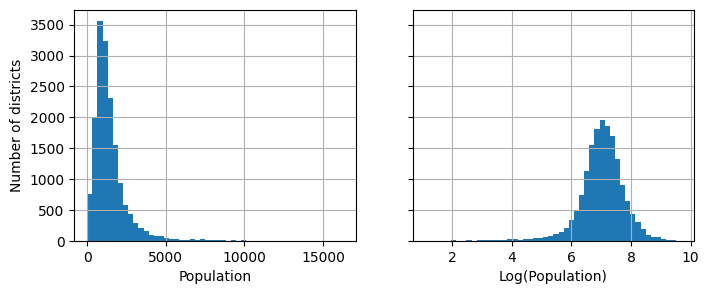

In [125]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
housing['population'].hist(bins=50, ax=ax1)
ax1.set_xlabel('Population')
ax1.set_ylabel('Number of districts')

np.log(housing['population']).hist(bins=50, ax=ax2)
ax2.set_xlabel('Log(Population)')

plt.show()

Otro enfoque para gestionar **características de cola pesada** consiste en **categorizar la característica**. Esto significa dividir su distribución en **segmentos de tamaño aproximadamente igual** y reemplazar cada valor de característica con el **índice del segmento** al que pertenece, de forma similar a como se creó la característica `income_cat` (aunque allí solo se usó para **muestreo estratificado**).  

Por ejemplo, se podría reemplazar cada valor con su **percentil**. Al categorizar con segmentos de igual tamaño, se obtiene una característica con una **distribución casi uniforme**, por lo que no es necesario escalar más, o simplemente se puede dividir por el **número de segmentos** para forzar los valores al rango 0‑1.  

Cuando una característica tiene una **distribución multimodal** (es decir, con dos o más picos claros, llamados **modas**), como la característica `housing_median_age`, también puede ser útil categorizarla, pero esta vez tratando los **identificadores de segmento como categorías**, en lugar de como valores numéricos.

Esto significa que los **índices de los segmentos** deben estar codificados, por ejemplo, con un **`OneHotEncoder`** (por lo que normalmente no conviene usar demasiados segmentos).  

Este enfoque permite que el **modelo de regresión aprenda con mayor facilidad** diferentes reglas para distintos rangos de este valor característico. Por ejemplo, quizás las casas construidas hace unos 35 años tienen un **estilo peculiar** que pasó de moda y, por lo tanto, son más baratas de lo que su antigüedad sugeriría.

Otro enfoque para transformar **distribuciones multimodales** consiste en **añadir una característica para cada uno de los modos** (al menos los principales), que represente la **similitud entre la mediana de la edad de la vivienda y ese modo en particular**.  

La **medida de similitud** se calcula generalmente mediante una **función de base radial (RBF)**, cualquier función que dependa únicamente de la **distancia entre el valor de entrada y un punto fijo**.  

La RBF más utilizada es la **RBF gaussiana**, cuyo valor de salida **decae exponencialmente** a medida que el valor de entrada se aleja del punto fijo.  Por ejemplo, la similitud de la RBF gaussiana entre la edad de la vivienda `x` y 35 viene dada por:  exp(–γ * (x – 35)²).


El hiperparámetro **γ (gamma)** determina la rapidez con la que la **medida de similitud decae** a medida que `x` se aleja de 35. Con la función **`rbf_kernel()`** de Scikit-Learn, se puede crear una nueva **RBF gaussiana** que mide la similitud entre la **edad mediana de la vivienda** y 35:


In [126]:
from sklearn.metrics.pairwise import rbf_kernel

age_simil_35 = rbf_kernel(housing[['housing_median_age']], [[35]], gamma=0.1)

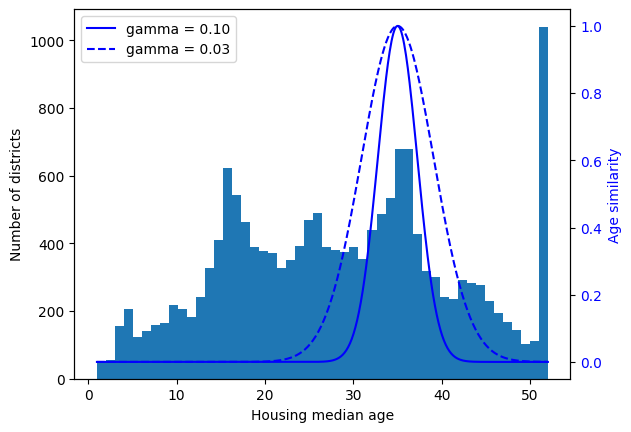

In [129]:
ages = np.linspace(housing['housing_median_age'].min(),
                   housing['housing_median_age'].max(),
                   500).reshape(-1, 1)
gamma1 = 0.1
gamma2 = 0.03
rbf1 = rbf_kernel(ages, [[35]], gamma=gamma1)
rbf2 = rbf_kernel(ages, [[35]], gamma=gamma2)

fig, ax1 = plt.subplots()

ax1.set_xlabel('Housing median age')
ax1.set_ylabel('Number of districts')
ax1.hist(housing['housing_median_age'], bins=50)

ax2 = ax1.twinx()
color = 'blue'
ax2.plot(ages, rbf1, color=color, label='gamma = 0.10')
ax2.plot(ages, rbf2, color=color, label='gamma = 0.03', linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel('Age similarity', color=color)

plt.legend(loc='upper left')
plt.show()

Hasta ahora solo hemos analizado las **características de entrada**, pero los **valores objetivo** también podrían necesitar ser transformados. Por ejemplo, si la **distribución objetivo tiene una cola pesada**, se puede optar por reemplazar el objetivo con su **logaritmo**. Sin embargo, si se hace, el **modelo de regresión predecirá el logaritmo** del valor mediano de la vivienda, no el valor mediano en sí. Se deberá calcular la **exponencial de la predicción** del modelo para obtener el valor mediano predicho de la vivienda.  

Afortunadamente, la mayoría de los **transformadores de Scikit-Learn** cuentan con el método **`inverse_transform()`**, lo que facilita el cálculo de la **inversa de sus transformaciones**.  

Por ejemplo, el siguiente código muestra cómo:  
1. Escalar las etiquetas usando un **`StandardScaler`** (igual que para las entradas).  
2. Entrenar un **modelo de regresión lineal simple** con las etiquetas escaladas.  
3. Realizar **predicciones sobre nuevos datos**, que se transforman de nuevo a la **escala original** usando `inverse_transform()` del escalador entrenado.  

> Nota: Convertimos las etiquetas de una **serie de Pandas a un DataFrame**, ya que `StandardScaler` espera **entradas 2D**. En este ejemplo, solo entrenamos el modelo con **una única característica de entrada sin procesar** (`median_income`) para simplificar:


In [143]:
from sklearn.linear_model import LinearRegression

target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(housing_labels.to_frame())

model = LinearRegression()
model.fit(housing[['median_income']], scaled_labels)
some_new_data = housing[['median_income']].iloc[:5]

scaled_predictions = model.predict(some_new_data)
predictions = target_scaler.inverse_transform(scaled_predictions)

Esto funciona bien, pero una opción más sencilla es usar un **`TransformedTargetRegressor`**.

Solo necesitamos:  
1. Construir el **regresor transformado**.  
2. Asignarle el **modelo de regresión** y el **transformador de etiquetas**.  
3. Ajustarlo al **conjunto de entrenamiento** utilizando las **etiquetas originales sin escalar**.  

Automáticamente, el regressor:  
- Usará el transformador para **escalar las etiquetas** y entrenar el modelo con las etiquetas escaladas, tal como hicimos anteriormente.  
- Cuando hagamos una predicción, llamará a **`predict()`** del modelo de regresión y usará **`inverse_transform()`** del escalador para generar la predicción final.

In [146]:
from sklearn.compose import TransformedTargetRegressor

model = TransformedTargetRegressor(
    LinearRegression(),
    transformer=StandardScaler()
)

model.fit(housing[['median_income']], housing_labels)
predictions = model.predict(some_new_data)